In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv('./BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [35]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [36]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis = 1, inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [38]:
df = df.replace({'Attrition_Flag' :{'Existing Customer': 0, 'Attrited Customer': 1}})

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_86710/2208558597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Attrition_Flag' :{'Existing Customer': 0, 'Attrited Customer': 1}})


In [39]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()

df['Gender'] = le.fit_transform(df.Gender)
df['Education_Level'] = le.fit_transform(df.Education_Level)
df['Marital_Status'] = le.fit_transform(df.Marital_Status)
df['Income_Category'] = le.fit_transform(df.Income_Category)
df['Card_Category'] = le.fit_transform(df.Card_Category)

In [41]:
df.select_dtypes('object').columns.any()

False

<Axes: >

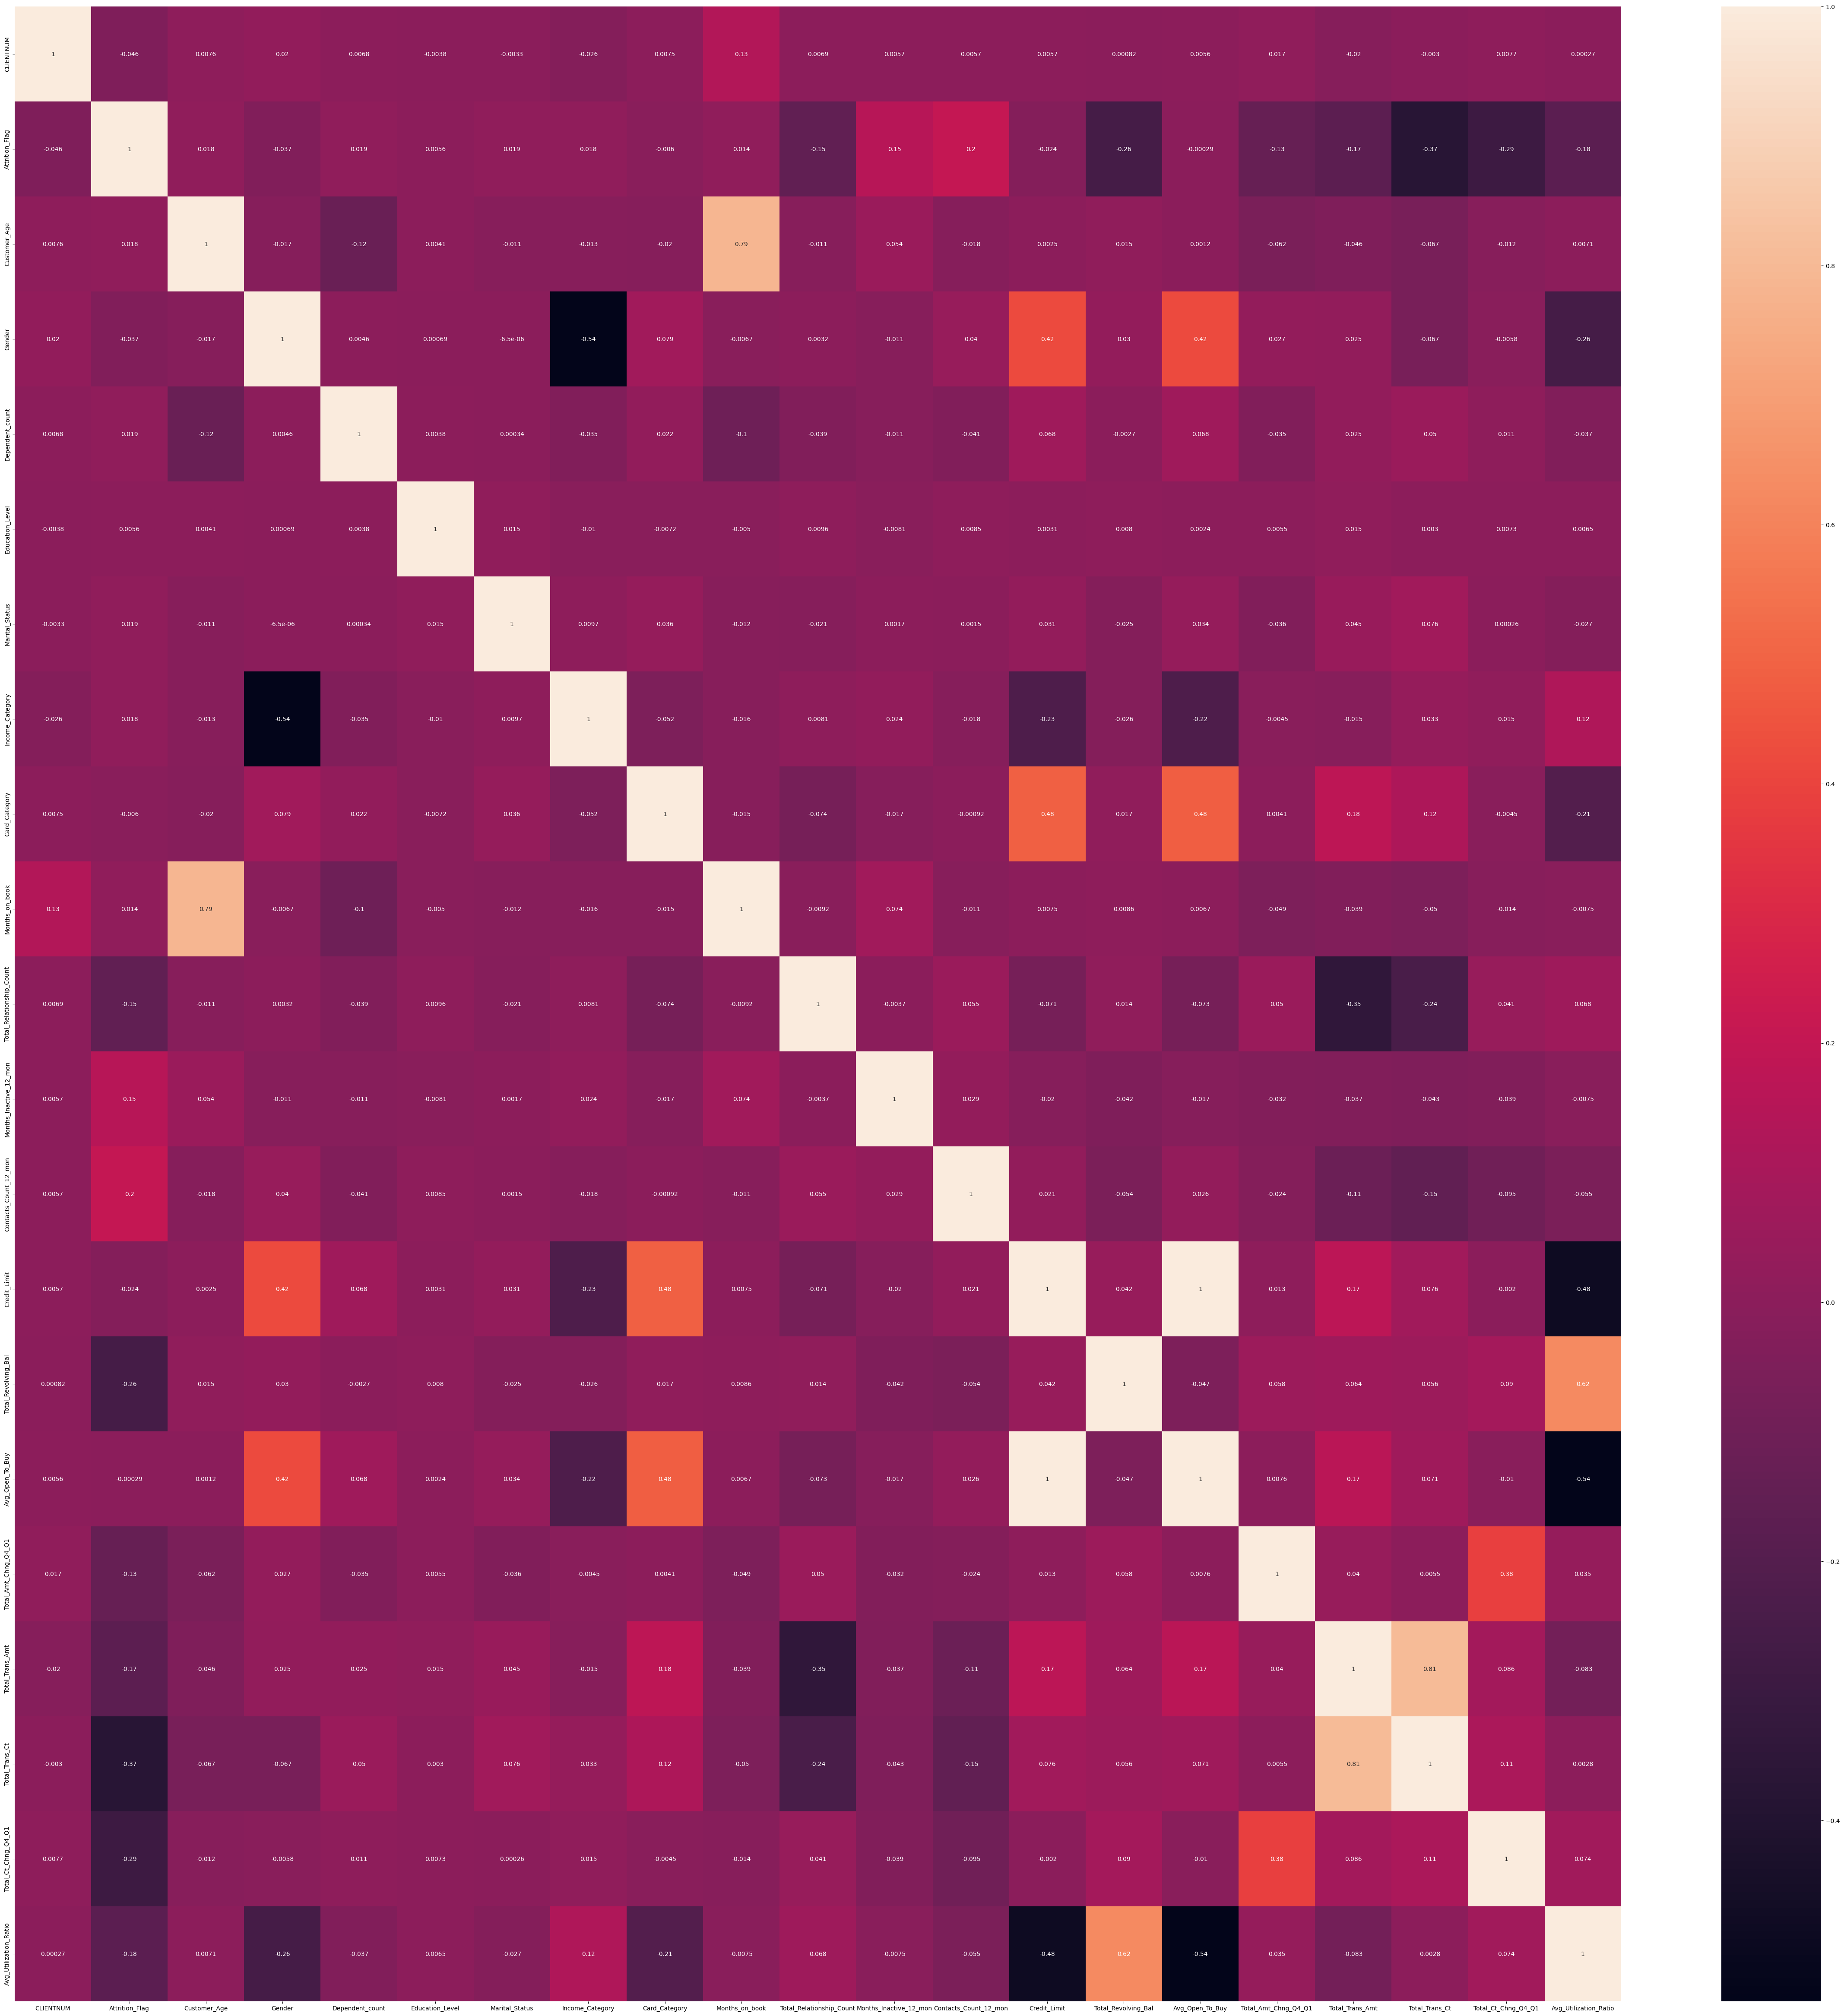

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

cor = df.corr()
plt.figure(figsize = (60,60))
sns.heatmap(data = cor, annot = True, cmap = "rocket")

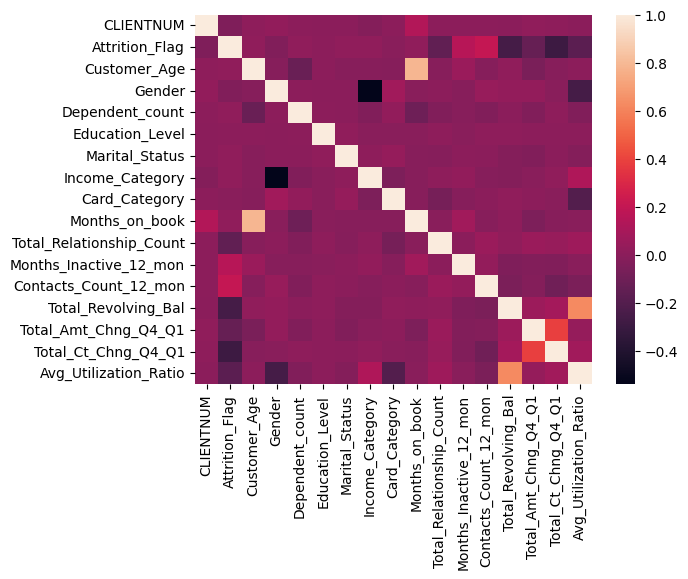

In [43]:
corr_matrix = df.corr()

np.fill_diagonal(corr_matrix.values, 0)

high_corr = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr) if i != j]

columns_to_drop = {col2 for col1, col2 in high_corr_pairs}

df = df.drop(columns=columns_to_drop)

sns.heatmap(df.corr())
plt.show()

In [44]:
X = df.drop('Attrition_Flag', axis = 1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42, stratify = y) 

sc = StandardScaler()
standard_X_train = sc.fit_transform(X_train)
standard_X_test = sc.transform(X_test)

rf = RandomForestClassifier()
rf.fit(standard_X_train, y_train)
rf.score(standard_X_test, y_test)

0.9007897334649556